# Experimento 1: amplitud en función de la distancia

Las ondas sísmicas son ondas mecánicas. A pesar de moverse en un medio muy complejo, exhibiendo comportamientos no lineales, podemos afirmar que siguen ciertas tendencias. Una de esas es la caída de la amplitud en función de la distancia. 

Para ilustrarlo, vamos a tomar las componentes verticales de todos los simómetros al momento del sismo de Jacó. Vamos a resumir su amplitud en un único valor y lo vamos a graficar contra la distancia. 

In [1]:
# Importe los módulos necesarios: obspy, numpy, matplotlib
import obspy
import numpy as np
import matplotlib.pyplot as plt


# Cargue el Stream datos/jaco-todas_las_estaciones.tar.mseed 
jaco = obspy.read('datos/jaco-todas_las_estaciones.tar.mseed')

# Pre-process
jaco.merge(fill_value=0)
jaco.detrend(type='linear')
resp = obspy.read_inventory('datos/jaco-todas_las_estaciones.dataless')
jaco.remove_response(inventory=resp, output='DISP',  taper_fraction=0.1, water_level=0)
jaco.filter('lowpass', freq=0.2)


29 Trace(s) in Stream:

OV.DUNO..HHZ | 2017-11-13T02:27:00.008400Z - 2017-11-13T02:37:59.998400Z | 100.0 Hz, 66000 samples
...
(27 other traces)
...
OV.VTRT..HHZ | 2017-11-13T02:27:00.000000Z - 2017-11-13T02:38:00.000000Z | 100.0 Hz, 66001 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [5]:
print(jaco.__str__(extended=True))

29 Trace(s) in Stream:
OV.DUNO..HHZ  | 2017-11-13T02:27:00.008400Z - 2017-11-13T02:37:59.998400Z | 100.0 Hz, 66000 samples
OV.BATAN..HHZ | 2017-11-13T02:27:00.008400Z - 2017-11-13T02:37:59.998400Z | 100.0 Hz, 66000 samples
OV.CDITO..HHZ | 2017-11-13T02:27:00.008400Z - 2017-11-13T02:37:59.998400Z | 100.0 Hz, 66000 samples
OV.CDM..HHZ   | 2017-11-13T02:27:00.008400Z - 2017-11-13T02:37:59.998400Z | 100.0 Hz, 66000 samples
OV.COVE..HHZ  | 2017-11-13T02:27:00.008400Z - 2017-11-13T02:37:59.998400Z | 100.0 Hz, 66000 samples
OV.CPMI..HHZ  | 2017-11-13T02:27:00.008400Z - 2017-11-13T02:37:59.998400Z | 100.0 Hz, 66000 samples
OV.GRZA..HHZ  | 2017-11-13T02:27:00.005000Z - 2017-11-13T02:37:59.995000Z | 100.0 Hz, 66000 samples
OV.HDC3..HHZ  | 2017-11-13T02:27:00.000000Z - 2017-11-13T02:38:00.000000Z | 100.0 Hz, 66001 samples
OV.INDI..HHZ  | 2017-11-13T02:27:00.005000Z - 2017-11-13T02:37:59.995000Z | 100.0 Hz, 66000 samples
OV.JACO..HHZ  | 2017-11-13T02:27:00.008400Z - 2017-11-13T02:37:59.998400Z | 1

Antes de proseguir, grafique algunas de las trazas. ¿Corresponden con lo esperado?

         network: OV
         station: VMAR
        location: 
         channel: HHZ
       starttime: 2017-11-13T02:27:00.008400Z
         endtime: 2017-11-13T02:37:59.998400Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 66000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 417, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 213504})
      processing: ["ObsPy 1.1.0: detrend(options={}::type='linear')", "ObsPy 1.1.0: remove_response(fig=None::inventory=<obspy.core.inventory.inventory.Inventory object at 0x7f8f2cf529e8>::output='DISP'::plot=False::pre_filt=None::taper=True::taper_fraction=0.1::water_level=0::zero_mean=True)", "ObsPy 1.1.0: filter(options={'freq': 0.2}::type='lowpass')"]


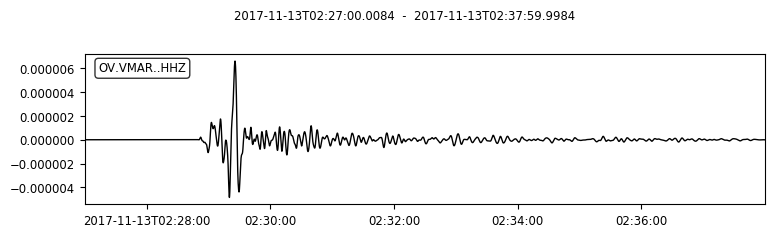

In [9]:
n = 23
print(jaco[n].stats)
jaco[n].plot()

Ahora vamos a intentar resumir la amplitud de la onda en un único valor. Para ello vamos a utilizar un diccionario, que asocia el nombre de cada estación con este valor. 

Para resumir el valor de la amplitud, simplemente vamos a tomar su valor absoluto y lo vamos a sumar.

In [15]:
ejemplo = {'uno':1, 'dos':2, 'tres':3, 4:'cuatro'}

ejemplo[4]

ejemplo[5] = 'cinco'
print(ejemplo)

ejemplo['dos'] = 45
print(ejemplo)

{'uno': 1, 'dos': 2, 'tres': 3, 4: 'cuatro', 5: 'cinco'}
{'uno': 1, 'dos': 45, 'tres': 3, 4: 'cuatro', 5: 'cinco'}


In [13]:
amplitud = {}

# utilice un for-loop para recorrer todas las estaciones. 
for estacion in jaco:
    # tome el valor absoluto de la señal y súmela
    amplitud[estacion.stats['station']] = np.sum(abs(estacion.data))
    # Añada el valor al diccionario
    
    
print(amplitud)

{'DUNO': 0.038456457844216314, 'BATAN': 0.045473374598676154, 'CDITO': 0.016209534621847432, 'CDM': 0.053722720065152378, 'COVE': 0.016094027014733121, 'CPMI': 0.024296637649555929, 'GRZA': 1.0643865444731251e-05, 'HDC3': 0.046213802521432194, 'INDI': 0.016308273095631851, 'JACO': 0.05675132740861423, 'JUDI': 0.019119281945696388, 'LAFE': 0.030275474157722457, 'MRVA': 0.01506462419018444, 'NARJ': 0.0075952146204520061, 'OCHAL': 1.697534170746975e-05, 'OCM': 0.015765382183131713, 'ORTG': 0.014074724120976174, 'POTG': 0.014930061070748237, 'RIFO': 0.07180280711521568, 'RIMA': 0.026974091241265184, 'RIOS': 1.7494659846051017e-05, 'VACR': 0.066399105086304186, 'VIMO': 0.055848692006771783, 'VMAR': 0.014556563735386779, 'VPTE': 0.055444008221379126, 'VTCV': 0.064647887188089934, 'VTLA': 0.059930382016922343, 'VTLO': 0.04616516887592733, 'VTRT': 0.053277731174026496}


El epicentro del sismo se localizó a 9.53° de latitud y -84.51° de longitud. En el directorio datos puede encontrar el archivo `ov_stations`, el cual contiene todas las estaciones de la red del OVSICORI. Este es un archivo `csv` que utiliza el espacio en blanco como separador. Lea este archivo y calcule la distancia euclideana entre el epicentro y la posición de cada una de las estaciones. Es conveniente utilizar un diccionario para esta tareas. 

In [23]:
import numpy as np

distancias = {}

# abra el archivo
f = open('datos/ov_stations')

# utilice un for-loop para recorrerlo 
for line in f:
    # utilice split() para separar por espacio en blanco
    line = line.split()
    # reste la distancia del epicentro a la estación
    delta_lat  = float(line[2]) - 9.53
    delta_long = float(line[3]) - (-84.51)
    # d = sqrt(x**2 + y**2)
    distancias[line[0]] = np.sqrt(np.power(delta_lat, 2) + np.power(delta_long, 2))

# Recuerde cerrar el archivo!
f.close()   
print(distancias)


{'ACHA': 0.79544867841992239, 'BATAN': 1.2681190992962867, 'CABA': 1.0923708161608845, 'CABS': 1.0923708161608845, 'CALV': 0.61445706115236942, 'CAO': 0.6142628834627647, 'CAO2': 0.61755404621781362, 'CAR': 1.0263655537867604, 'CCOL': 1.9029308474035567, 'CDITO': 1.8963695657756252, 'CDM': 0.74667622166505843, 'COVE': 1.1944018837895405, 'CPMI': 0.76299846657775228, 'CRPO': 0.72334175878349638, 'COVR': 1.8593946219132809, 'DUNO': 1.1265773386678781, 'EPA': 0.46414942637043027, 'GRZA': 1.189783850117315, 'HATI': 1.4166319070245439, 'HAYA': 0.80482659623052455, 'HDC3': 0.61786759908576083, 'HRIU': 1.5841873784372851, 'HZTE': 1.6060008872973839, 'INDI': 1.0477084947636888, 'IRZ2': 0.75345981312875232, 'JACO': 0.19969979969944104, 'JUD3': 1.2108837268705774, 'JUDI': 1.2094619671572895, 'LAFE': 0.48690854377388104, 'LAR': 0.52874146801627864, 'LEPA': 0.66642593737038258, 'LIBE': 1.4165762245639968, 'LORE': 0.93627979258339677, 'MANS': 1.0382622404768476, 'MRVA': 1.1072453431828111, 'MURC': 

Ahora, vamos a crear dos listas. La primera contiene las distancias al epicentro, la segunda la amplitud de la señal. Para ello iteramos sobre el diccionario de amplitud creado previamiente. 

In [27]:
print(amplitud.items())

dict_items([('DUNO', 4.3016125956750434e-06), ('BATAN', 1.807466939599166e-05), ('CDITO', 3.5697930325855372e-06), ('CDM', 2.8326011264299673e-05), ('COVE', 7.7021626339695698e-06), ('CPMI', 1.3005636773948159e-05), ('GRZA', 3.9932202672476675e-10), ('HDC3', 2.3982388722392445e-05), ('INDI', 3.5824916119232081e-06), ('JACO', 3.4524326878354608e-05), ('JUDI', 7.3078810496614702e-06), ('LAFE', 6.953649930481248e-06), ('MRVA', 1.0853866820639724e-06), ('NARJ', 3.1964883382171704e-06), ('OCHAL', 3.6115768992215894e-09), ('OCM', 8.5864814361190935e-06), ('ORTG', 4.7011228060597596e-06), ('POTG', 3.920892572906663e-06), ('RIFO', 1.6955194807768491e-05), ('RIMA', 1.3874566698016295e-05), ('RIOS', 6.142855612091178e-09), ('VACR', 3.1092624518583488e-05), ('VIMO', 2.8229783869567953e-05), ('VMAR', 6.6096270952962548e-06), ('VPTE', 2.7996963470886979e-05), ('VTCV', 2.9148346462569001e-05), ('VTLA', 3.2135890728849995e-05), ('VTLO', 1.8512281661381913e-05), ('VTRT', 2.5144134701896201e-05)])


In [24]:
dist = []
amp  = []

for k,v in amplitud.items():
    amp.append(v)
    dist.append(distancias[k])
    
print(dist)
print(amp)

[1.1265773386678781, 1.2681190992962867, 1.8963695657756252, 0.74667622166505843, 1.1944018837895405, 0.76299846657775228, 1.189783850117315, 0.61786759908576083, 1.0477084947636888, 0.19969979969944104, 1.2094619671572895, 0.48690854377388104, 1.1072453431828111, 1.1242329340488082, 0.96651803914878143, 0.65768084965278339, 1.262269499750349, 1.4707703627691249, 0.98208333658606195, 0.68834040997169432, 1.2959509018477504, 0.95634146621381932, 0.75199460104445015, 1.4203930793973911, 0.71339995093916697, 0.90490800637413882, 0.87371410083620127, 0.68834040997169432, 0.8586636652380335]
[0.038456457844216314, 0.045473374598676154, 0.016209534621847432, 0.053722720065152378, 0.016094027014733121, 0.024296637649555929, 1.0643865444731251e-05, 0.046213802521432194, 0.016308273095631851, 0.05675132740861423, 0.019119281945696388, 0.030275474157722457, 0.01506462419018444, 0.0075952146204520061, 1.697534170746975e-05, 0.015765382183131713, 0.014074724120976174, 0.014930061070748237, 0.07180

Ahora, grafique la amplitud en función de la distancia

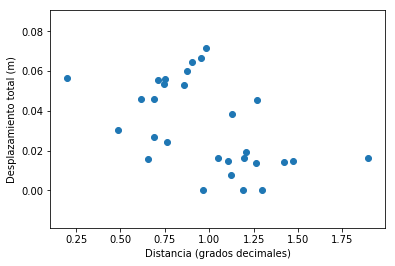

In [25]:
plt.scatter(dist, amp)
plt.xlabel('Distancia (grados decimales)')
plt.ylabel('Desplazamiento total (m)')
plt.show()

¿No se ve como el patrón más claro del mundo, verdad? Calculemos una línea de tendencia. 

In [26]:
tendencia = np.polyfit(dist, amp, 1)
print(tendencia)

[-0.0322827   0.06429352]


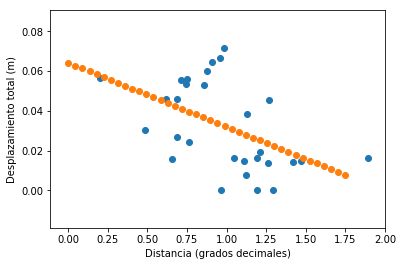

In [27]:
t = np.poly1d(tendencia)
x = np.linspace(0,1.75,40)
t_y = np.array([t(y) for y in x])

plt.scatter(dist, amp)
plt.scatter(x, t_y)
plt.xlabel('Distancia (grados decimales)')
plt.ylabel('Desplazamiento total (m)')
plt.show()